# Fashion MNIST
---

APPROACH::
* Load all lib and datas
* Data preparation and data transformation
* View images
* Model
     - Neural network(mlp,dense,fcn)
     -Sklearn
     -tensor flow


## Loading the libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


Load the data

In [9]:
train=pd.read_csv('/content/fashion-mnist_train.csv')

In [4]:
test=pd.read_csv('/content/fashion-mnist_test.csv')

Audit the data

In [10]:
train.shape

(60000, 785)

In [6]:
test.shape

(10000, 785)

In [11]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Labels

Each training and test example is assigned to one of the following labels:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

In [12]:
train.info(max_cols=785)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 785 columns):
 #    Column    Non-Null Count  Dtype
---   ------    --------------  -----
 0    label     60000 non-null  int64
 1    pixel1    60000 non-null  int64
 2    pixel2    60000 non-null  int64
 3    pixel3    60000 non-null  int64
 4    pixel4    60000 non-null  int64
 5    pixel5    60000 non-null  int64
 6    pixel6    60000 non-null  int64
 7    pixel7    60000 non-null  int64
 8    pixel8    60000 non-null  int64
 9    pixel9    60000 non-null  int64
 10   pixel10   60000 non-null  int64
 11   pixel11   60000 non-null  int64
 12   pixel12   60000 non-null  int64
 13   pixel13   60000 non-null  int64
 14   pixel14   60000 non-null  int64
 15   pixel15   60000 non-null  int64
 16   pixel16   60000 non-null  int64
 17   pixel17   60000 non-null  int64
 18   pixel18   60000 non-null  int64
 19   pixel19   60000 non-null  int64
 20   pixel20   60000 non-null  int64
 21   pixel21   

In [13]:
test.info(max_cols=785)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 785 columns):
 #    Column    Non-Null Count  Dtype
---   ------    --------------  -----
 0    label     10000 non-null  int64
 1    pixel1    10000 non-null  int64
 2    pixel2    10000 non-null  int64
 3    pixel3    10000 non-null  int64
 4    pixel4    10000 non-null  int64
 5    pixel5    10000 non-null  int64
 6    pixel6    10000 non-null  int64
 7    pixel7    10000 non-null  int64
 8    pixel8    10000 non-null  int64
 9    pixel9    10000 non-null  int64
 10   pixel10   10000 non-null  int64
 11   pixel11   10000 non-null  int64
 12   pixel12   10000 non-null  int64
 13   pixel13   10000 non-null  int64
 14   pixel14   10000 non-null  int64
 15   pixel15   10000 non-null  int64
 16   pixel16   10000 non-null  int64
 17   pixel17   10000 non-null  int64
 18   pixel18   10000 non-null  int64
 19   pixel19   10000 non-null  int64
 20   pixel20   10000 non-null  int64
 21   pixel21   1

In [14]:
train.skew()

label         0.000000
pixel1      143.091194
pixel2       90.419440
pixel3      127.905289
pixel4       44.613085
               ...    
pixel780      2.700864
pixel781      4.254187
pixel782      7.961132
pixel783     14.290953
pixel784     47.238606
Length: 785, dtype: float64

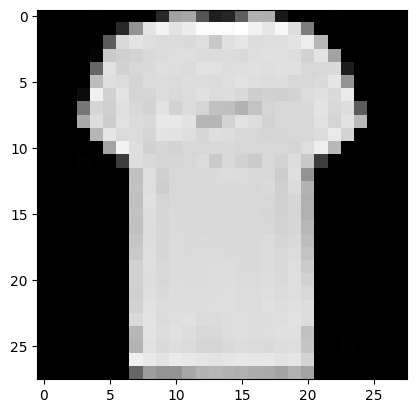

In [37]:
features = ["pixel{}".format(pixel_num) for pixel_num in range(1,785)]
rows_to_examine = 10
image_data = np.reshape(train[features][rows_to_examine:rows_to_examine+1].to_numpy(), (28,28))
plt.imshow(image_data, cmap = 'gray')

## Divide the data into x and y (feature and target)

In [21]:
x=train.iloc[:,1:]
y=train['label']

 * x is the feature variable
 * y ('label') is the target variable
  

Splitting into test and train

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

- Splitting the train and test data with 80 and 20 percentage respectively with a random state 123

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


## Single layer Perceptorn - SLP

In [24]:
slp=Perceptron(verbose=1)
slp.fit(x_train,y_train)
preds_slp_train=slp.predict(x_train)
preds_slp_test=slp.predict(x_test)

-- Epoch 1
Norm: 53717.69, NNZs: 783, Bias: -79.000000, T: 48000, Avg. loss: 300315.256500
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 62354.58, NNZs: 784, Bias: -140.000000, T: 96000, Avg. loss: 297111.988625
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 71210.45, NNZs: 784, Bias: -199.000000, T: 144000, Avg. loss: 286966.761063
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 77926.15, NNZs: 783, Bias: -280.000000, T: 192000, Avg. loss: 294703.786187
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 85439.47, NNZs: 784, Bias: -372.000000, T: 240000, Avg. loss: 294710.997146
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 91029.39, NNZs: 784, Bias: -435.000000, T: 288000, Avg. loss: 287022.618167
Total training time: 0.45 seconds.
-- Epoch 7
Norm: 94805.77, NNZs: 784, Bias: -494.000000, T: 336000, Avg. loss: 287587.723562
Total training time: 0.52 seconds.
-- Epoch 8
Norm: 99334.58, NNZs: 784, Bias: -596.000000, T: 384000, Avg. loss: 288378.091500
Total training

* The SLP took 21 EPOCH ie itertions

In [25]:
def model_eval(actual,predicted):
  acc_score=accuracy_score(actual,predicted)
  cm_matrix=confusion_matrix(actual,predicted)
  clas_rep=classification_report(actual,predicted)
  print("Accuracy :",round(acc_score,2))
  print(" ")
  print(cm_matrix)
  print(" ")
  print(clas_rep)

In [26]:
model_eval(y_train,preds_slp_train)

Accuracy : 0.83
 
[[4178   12  119  189   97    0  198    0   67    0]
 [  12 4590   23   90   39    0    2    0    3    0]
 [  62    5 3497   60 1076    0   54    0   34    0]
 [ 167   45   48 4214  327    0   31    2   16    1]
 [  13    4  248  105 4426    0   40    1   13    0]
 [  27    3   42   12   16 3775    9  638  134  120]
 [ 769    9  731  191 1471    0 1513    1  106    1]
 [   0    0    1    0    0   13    0 4680   18   61]
 [  18    1   48   52   80    2   17   22 4533    3]
 [   7    2    5    1    2   26    1  339    9 4383]]
 
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      4860
           1       0.98      0.96      0.97      4759
           2       0.73      0.73      0.73      4788
           3       0.86      0.87      0.86      4851
           4       0.59      0.91      0.71      4850
           5       0.99      0.79      0.88      4776
           6       0.81      0.32      0.45      4792
           7    

Inference -
* 6 , 4 , 2 are having least f1 score


In [27]:
model_eval(y_test,preds_slp_test)

Accuracy : 0.81
 
[[ 968    5   29   51   23    1   48    1   14    0]
 [   5 1176   11   32   13    0    1    0    2    1]
 [   8    1  872   21  279    0   21    0   10    0]
 [  55   14   17  958   92    0    7    1    4    1]
 [   4    1   71   35 1020    0   16    0    3    0]
 [   5    1   14    1    4  936    5  181   41   36]
 [ 207    1  199   41  382    0  341    1   35    1]
 [   0    0    0    0    0    3    0 1204    1   19]
 [   3    0    6   20   22    1    7   10 1155    0]
 [   7    0    1    1    0    8    0  104    2 1102]]
 
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1140
           1       0.98      0.95      0.96      1241
           2       0.71      0.72      0.72      1212
           3       0.83      0.83      0.83      1149
           4       0.56      0.89      0.68      1150
           5       0.99      0.76      0.86      1224
           6       0.76      0.28      0.41      1208
           7    

Inference -
* 6 , 4  are having least f1 score


## Multilayer perceptron

Assigning hidden_layer_sizes=(8,8,8)

In [28]:
mlp=MLPClassifier(hidden_layer_sizes=(8,8,8),verbose=1,max_iter=250)

In [29]:
mlp.fit(x_train,y_train)
preds_mlp_train=mlp.predict(x_train)
preds_mlp_test=mlp.predict(x_test)

Iteration 1, loss = 2.95430939
Iteration 2, loss = 2.07942640
Iteration 3, loss = 1.93430741
Iteration 4, loss = 1.79329427
Iteration 5, loss = 1.74161022
Iteration 6, loss = 1.69343886
Iteration 7, loss = 1.66097368
Iteration 8, loss = 1.65927843
Iteration 9, loss = 1.58573830
Iteration 10, loss = 1.52928742
Iteration 11, loss = 1.49505700
Iteration 12, loss = 1.45203500
Iteration 13, loss = 1.24309627
Iteration 14, loss = 1.12208586
Iteration 15, loss = 1.07663819
Iteration 16, loss = 1.05581757
Iteration 17, loss = 1.03365692
Iteration 18, loss = 1.01559456
Iteration 19, loss = 1.00211995
Iteration 20, loss = 0.98005666
Iteration 21, loss = 0.97150274
Iteration 22, loss = 0.96876124
Iteration 23, loss = 0.95657014
Iteration 24, loss = 0.96030985
Iteration 25, loss = 0.93907124
Iteration 26, loss = 0.83267150
Iteration 27, loss = 0.79015187
Iteration 28, loss = 0.78781049
Iteration 29, loss = 0.78516006
Iteration 30, loss = 0.78197444
Iteration 31, loss = 0.76521546
Iteration 32, los

In [30]:
model_eval(y_train,preds_mlp_train)


Accuracy : 0.79
 
[[3884   34  145  333  153    2  262    0   47    0]
 [ 115 4450   55  112   15    0   10    1    1    0]
 [  68    0 3649   40  910    1   82    0   38    0]
 [ 312   72   45 3998  278    0  115    0   31    0]
 [  34    1  808  341 3450    0  130    0   86    0]
 [   2    0    1    0    3 4625    1  123   13    8]
 [ 950    1  818  209 2308    0  421    0   85    0]
 [   0    0    2    0    1   36    0 4571   15  148]
 [   5    1   44   33  196   11    7    9 4470    0]
 [   0    0    0    0    2   16    0  197    2 4558]]
 
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      4860
           1       0.98      0.94      0.96      4759
           2       0.66      0.76      0.70      4788
           3       0.79      0.82      0.81      4851
           4       0.47      0.71      0.57      4850
           5       0.99      0.97      0.98      4776
           6       0.41      0.09      0.14      4792
           7    

Inference -
* 6 , 4 , 2 are having least f1 score


In [31]:
model_eval(y_test,preds_mlp_test)

Accuracy : 0.77
 
[[ 890   10   45   92   37    1   55    0   10    0]
 [  29 1141   17   41    6    0    4    1    2    0]
 [  10    0  902   12  254    0   25    0    9    0]
 [  77   26   13  926   76    0   21    0   10    0]
 [  10    0  204   78  794    0   37    1   26    0]
 [   0    0    1    0    3 1104    1   74   18   23]
 [ 236    0  213   46  580    0   95    0   38    0]
 [   0    0    2    0    3   43    0 1130    0   49]
 [   2    0   10   10   50   12    2    4 1134    0]
 [   0    0    0    0    0   20    0   57    0 1148]]
 
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1140
           1       0.97      0.92      0.94      1241
           2       0.64      0.74      0.69      1212
           3       0.77      0.81      0.79      1149
           4       0.44      0.69      0.54      1150
           5       0.94      0.90      0.92      1224
           6       0.40      0.08      0.13      1208
           7    

Inference -
* 6 , 4 , 2 are having least f1 score


Assigning hidden_layer_sizes=(128,128,128)

In [32]:
mlp=MLPClassifier(hidden_layer_sizes=(128,128,128),verbose=1,max_iter=250)

In [33]:
mlp.fit(x_train,y_train)
preds_mlp_train=mlp.predict(x_train)
preds_mlp_test=mlp.predict(x_test)

Iteration 1, loss = 2.31366633
Iteration 2, loss = 0.69356662
Iteration 3, loss = 0.55600574
Iteration 4, loss = 0.46823147
Iteration 5, loss = 0.43919383
Iteration 6, loss = 0.40336822
Iteration 7, loss = 0.37851155
Iteration 8, loss = 0.36673487
Iteration 9, loss = 0.35150195
Iteration 10, loss = 0.33323080
Iteration 11, loss = 0.32753780
Iteration 12, loss = 0.32163858
Iteration 13, loss = 0.31092550
Iteration 14, loss = 0.31504155
Iteration 15, loss = 0.30866852
Iteration 16, loss = 0.30304937
Iteration 17, loss = 0.30595168
Iteration 18, loss = 0.29094559
Iteration 19, loss = 0.28076856
Iteration 20, loss = 0.28137718
Iteration 21, loss = 0.29400506
Iteration 22, loss = 0.28009581
Iteration 23, loss = 0.26190591
Iteration 24, loss = 0.27077180
Iteration 25, loss = 0.26938931
Iteration 26, loss = 0.27210319
Iteration 27, loss = 0.26191759
Iteration 28, loss = 0.25118817
Iteration 29, loss = 0.25491140
Iteration 30, loss = 0.25944579
Iteration 31, loss = 0.24278810
Iteration 32, los

In [35]:
model_eval(y_train,preds_mlp_train)


Accuracy : 0.98
 
[[4781    1    4    7    1    0   65    0    1    0]
 [   0 4758    0    1    0    0    0    0    0    0]
 [  16    0 4614    7  119    0   32    0    0    0]
 [  32    2    8 4774   25    0   10    0    0    0]
 [   1    0  200   53 4560    0   36    0    0    0]
 [   0    0    0    0    0 4773    0    2    0    1]
 [ 105    1  113   13  106    0 4453    0    1    0]
 [   0    0    0    0    0    0    0 4771    0    2]
 [   2    0    5    0    0    0    0    0 4769    0]
 [   0    0    0    0    0    0    0    1    0 4774]]
 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4860
           1       1.00      1.00      1.00      4759
           2       0.93      0.96      0.95      4788
           3       0.98      0.98      0.98      4851
           4       0.95      0.94      0.94      4850
           5       1.00      1.00      1.00      4776
           6       0.97      0.93      0.95      4792
           7    

In [36]:
model_eval(y_test,preds_mlp_test)


Accuracy : 0.88
 
[[ 951    2   27   27    3    0  126    0    4    0]
 [   7 1217    2   10    3    0    1    0    1    0]
 [  16    1  989   18  104    0   81    0    3    0]
 [  49   21   11  993   43    1   30    0    0    1]
 [   4    3  137   44  912    0   49    0    1    0]
 [   0    0    0    0    0 1175    0   30    7   12]
 [ 155    5  113   28   95    0  798    0   14    0]
 [   0    0    0    0    0   11    1 1164    1   50]
 [   5    2   10    5    6    0    8    2 1186    0]
 [   0    0    0    0    0   10    0   38    2 1175]]
 
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1140
           1       0.97      0.98      0.98      1241
           2       0.77      0.82      0.79      1212
           3       0.88      0.86      0.87      1149
           4       0.78      0.79      0.79      1150
           5       0.98      0.96      0.97      1224
           6       0.73      0.66      0.69      1208
           7    